In [1]:
# Standard-Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow

# Unsere Daten-Utilities
from src.data import load_raw_data

# Konfiguration
from src.config import RAW_DIR

# Plot-Style
sns.set_theme(style="whitegrid")

In [2]:
# Daten einlesen
df = load_raw_data("train.csv")

# Erste Zeilen anzeigen
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Numerische Zusammenfassung
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


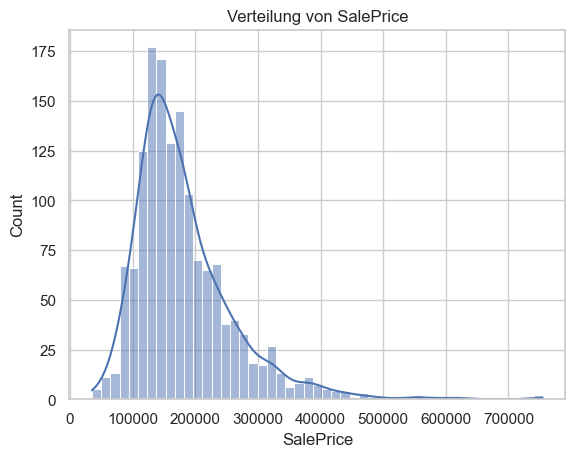

In [8]:
# Zielvariable-Distribution
sns.histplot(df["SalePrice"], kde=True)
plt.title("Verteilung von SalePrice")
plt.show()

Rechtsschiefe Verteilung, meiste sind zwischen 100 und 300k aber einige Luxusimmobilien die einen langen Schwanz verursachen. Damit nicht überangepasst wird auf diese teuren Häuser werden wir später die Verteilung normal anpassen. Abstand wir durch log zusammengestaucht.

In [10]:
# 1. Nur numerische Spalten auswählen
num_df = df.select_dtypes(include=[np.number])

# 2. Korrelationsmatrix nur für diese Spalten
corr_matrix = num_df.corr()

# 3. Absolute Korrelation von SalePrice sortieren, Top 10 (ohne sich selbst)
top_corr = (
    corr_matrix["SalePrice"]
    .abs()
    .sort_values(ascending=False)
    .iloc[1:11]
)

top_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [6]:
# Prozent fehlender Werte pro Spalte
missing = df.isna().mean().sort_values(ascending=False) * 100
missing.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

In [13]:
# Features, die wir komplett droppen
drop_feats = missing[missing > 50].index.tolist()

# Kategorische zum Auffüllen mit 'None'
cat_feats = df.select_dtypes(include=["object"]).columns
cat_impute_feats = [
    f for f in cat_feats
    if 0 < df[f].isna().mean() < 0.5
]

# Numerische zum median-Imputieren
num_feats = df.select_dtypes(include=[np.number]).columns.drop("SalePrice")
num_impute_feats = []                  # leere Liste anlegen
for f in num_feats:                    # für jedes Feature f in num_feats
    missing_pct = df[f].isna().mean()  # Anteil der fehlenden Werte in Spalte f
    # prüfen, ob mehr als 0% und weniger als 50% fehlen
    if missing_pct > 0 and missing_pct < 0.5:
        num_impute_feats.append(f)     # dann f in unsere Liste aufnehmen

In [14]:
# 1. Drop-Features entfernen
df_clean = df.drop(columns=drop_feats)

# 2. Kategorische Imputation
for f in cat_impute_feats:
    df_clean[f] = df_clean[f].fillna("None")

# 3. Numerische Imputation
for f in num_impute_feats:
    median = df_clean[f].median()
    df_clean[f] = df_clean[f].fillna(median)

# 4. Überprüfen, dass keine NAs mehr vorhanden sind (außer in Test-Daten)
assert df_clean.isna().sum().sum() == 0 # assert gibt Fehlermeldung wenn Bedingung nicht erfüllt, sonst passiert gar nichts

In [15]:
from src.data import save_processed_data

# Speichere das bereinigte Training
save_processed_data(df_clean, "train_clean.csv")

# MLflow Ergebnisse visualisieren

In [7]:
import os, mlflow
# Pfad zu deinem Projekt-Root
project_root = "/Users/hillenberg/DataspellProjects/housing-price"
# Setze das Tracking-URI auf genau dieses mlruns-Verzeichnis
mlflow.set_tracking_uri(f"file://{os.path.join(project_root, 'mlruns')}")
print("Now tracking URI is:", mlflow.get_tracking_uri())

Now tracking URI is: file:///Users/hillenberg/DataspellProjects/housing-price/mlruns


In [11]:
experiment_id = '620587838464852309'

# Alle runs laden
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_ids=[experiment_id],
                          filter_string="",
                          run_view_type=mlflow.entities.ViewType.ACTIVE_ONLY)

# in Dataframe umwandeln
records = []
for r in runs:
    rec = {
        "run_id": r.info.run_id,
        "model_type": r.data.params.get("model_type", "n/a"),
        "mean_cv_rmse": float(r.data.metrics.get("mean_cv_rmse", float("nan"))),
    }
    # falls du die Fold-Metriken auch sehen willst:
    for i in range(1, 6):
        metric = r.data.metrics.get(f"rmse_fold_{i}")
        rec[f"fold_{i}_rmse"] = float(metric) if metric is not None else None
    records.append(rec)

df_runs = pd.DataFrame.from_records(records)

In [12]:
df_runs

,run_id,model_type,mean_cv_rmse,fold_1_rmse,fold_2_rmse,fold_3_rmse,fold_4_rmse,fold_5_rmse
0,5c577753d374472b8f6799694532eb88,xgb,0.126315,0.130056,0.113317,0.159681,0.124851,0.103671
1,6621b2b41198495ca525d820af133e19,lasso,0.398782,0.433244,0.395838,0.375370,0.421005,0.368452
2,a2baf69cd52e439884a97dcfceaf91b7,lgbm,0.135778,0.138091,0.122598,0.168452,0.134078,0.115672
3,bc5a26f70f4b42c89bdb69d8ebccf29b,n/a,0.135778,0.138091,0.122598,0.168452,0.134078,0.115672
4,53b4699400bd456c8a251e31226711e3,n/a,0.135778,0.138091,0.122598,0.168452,0.134078,0.115672
5,9169170093ab426e98c80886fc214593,n/a,0.126315,0.130056,0.113317,0.159681,0.124851,0.103671
6,3c1e75a322b84bc1bd54cb51f1d6d075,n/a,0.126315,0.130056,0.113317,0.159681,0.124851,0.103671
7,7405aa0744bb423e859c53184b9b01bb,n/a,0.126315,0.130056,0.113317,0.159681,0.124851,0.103671
8,02711ee8f8664ac89c04e666b95db9c1,n/a,0.134282,0.137019,0.120142,0.168070,0.134791,0.111388
9,d95f7e98b23b4eaca1e09ca64dac0fb4,n/a,0.134282,0.137032,0.120134,0.168064,0.134773,0.111408


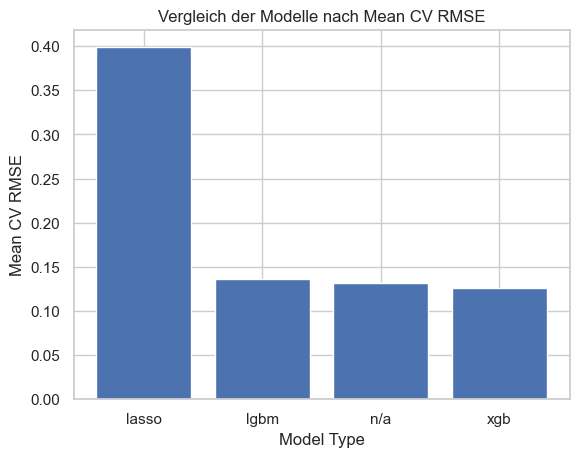

In [13]:
# Plot: Modell-Typ vs. Mean RMSE
fig, ax = plt.subplots()
# aggregiere Mittelwert pro Modell-Typ
df_plot = df_runs.groupby("model_type")["mean_cv_rmse"].mean().reset_index()
ax.bar(df_plot["model_type"], df_plot["mean_cv_rmse"])
ax.set_xlabel("Model Type")
ax.set_ylabel("Mean CV RMSE")
ax.set_title("Vergleich der Modelle nach Mean CV RMSE")
plt.show()